In [9]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [26]:
dataset_train = pd.read_csv(os.path.join("data", "train.csv"), low_memory=False)
dataset_train["Datum_Uhrzeit_CET"] = pd.to_datetime(dataset_train["Datum_Uhrzeit_CET"], errors="coerce")

dataset_test = pd.read_csv(os.path.join("data", "test.csv"), low_memory=False)
dataset_test["Datum_Uhrzeit_CET"] = pd.to_datetime(dataset_test["Datum_Uhrzeit_CET"], errors="coerce")

In [27]:
dataset_train.head()

,id,Datum_Uhrzeit_CET,Demand,correction,correctedDemand,FRCE,controlBandPos,controlBandNeg,LFCInput,aFRRactivation,aFRRrequest,participationCMO,participationIN,correctionEcho,BandLimitedCorrectedDemand,controlArea
0,0,2022-10-23 00:00:04,-200.723,200.723,0.000,58.0890,127,-125.0,137.5740,-58.0890,-11.097600,1.0,1.0,249.719,0.0,2
1,1,2022-10-23 00:00:04,-656.771,134.514,-522.256,-265.9470,249,-167.0,-221.6890,-256.3040,-167.000000,1.0,1.0,185.760,-167.0,1
2,2,2022-10-23 00:00:08,-196.995,196.995,0.000,56.3801,127,-125.0,109.1030,-56.3800,0.261344,1.0,1.0,200.723,0.0,2
3,3,2022-10-23 00:00:08,-639.424,158.032,-481.392,-223.3750,249,-167.0,-219.0110,-258.0160,-167.000000,1.0,1.0,183.128,-167.0,1
4,4,2022-10-23 00:00:12,-206.247,206.247,0.000,53.3933,127,-125.0,47.8701,-53.3923,1.914730,1.0,1.0,196.995,0.0,2


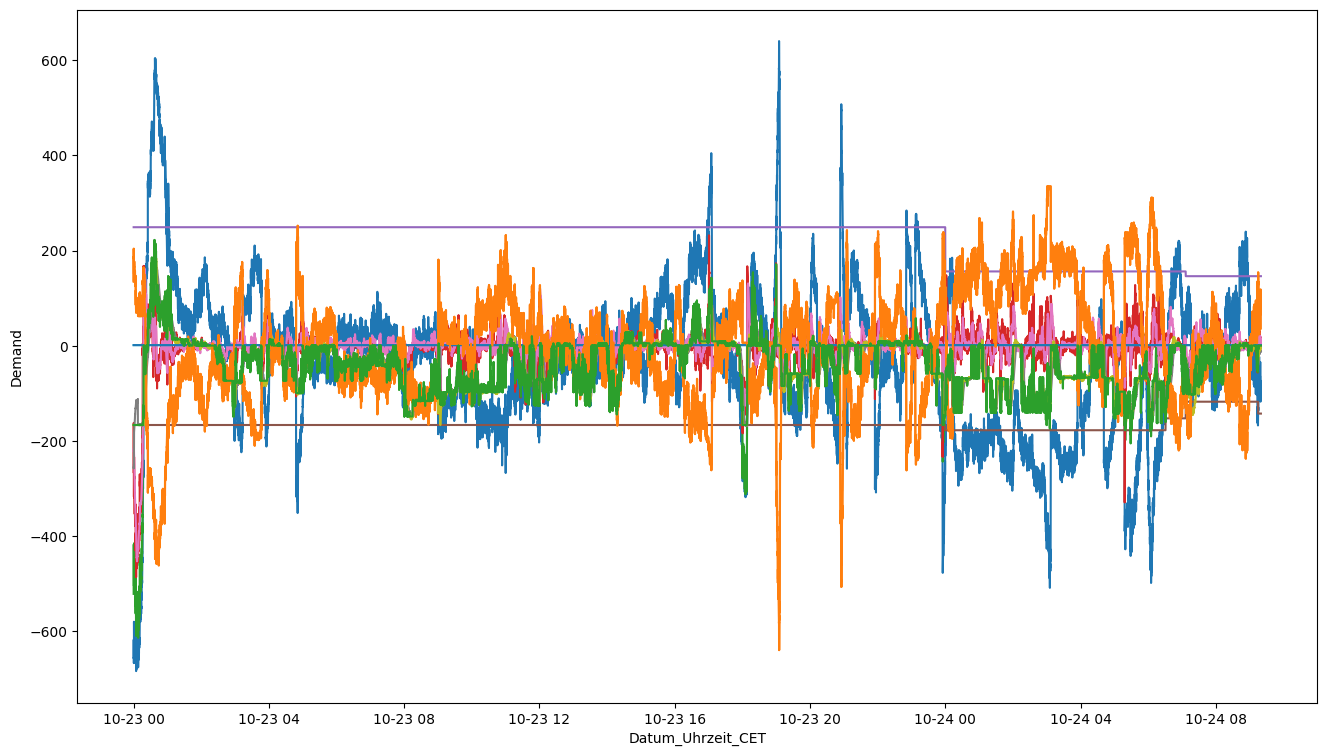

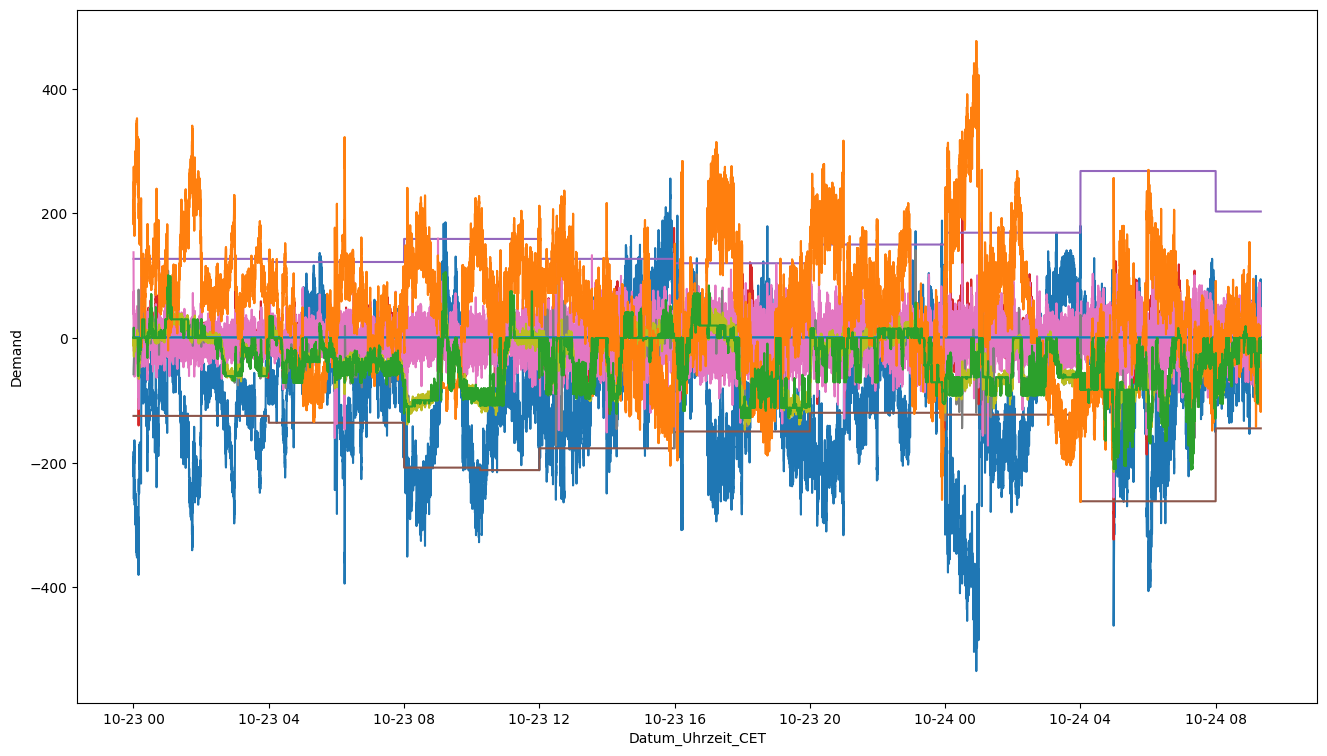

In [31]:
NUM_STEPS_THRESHOLD = 30000

for control_area in [1, 2]:
    area_subset_train = dataset_train[dataset_train["controlArea"] == control_area][:NUM_STEPS_THRESHOLD]

    fig, ax = plt.subplots(figsize=(16, 9))

    sns.lineplot(x="Datum_Uhrzeit_CET", y="Demand", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="correction", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="correctedDemand", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="FRCE", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="controlBandPos", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="controlBandNeg", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="LFCInput", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="aFRRactivation", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="aFRRrequest", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="participationCMO", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="participationIN", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="correctionEcho", data=area_subset_train, ax=ax)
    sns.lineplot(x="Datum_Uhrzeit_CET", y="BandLimitedCorrectedDemand", data=area_subset_train, ax=ax)

    plt.show()